4878.80319976492 

Convergence reached at iteration:  5195


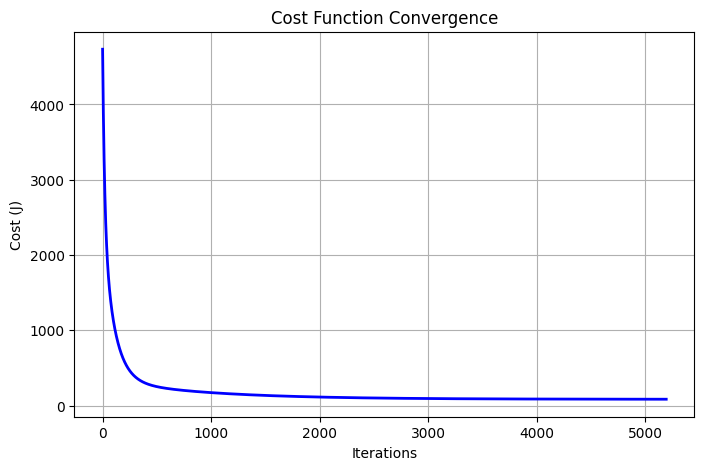

R^2 accuracy:  0.9568318848598202
MSE:  245.16897123028718
RMSE:  15.657872500128718


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
train=pd.read_csv("train (1).csv")
test=pd.read_csv("test (1).csv")
#we don't need date symbols and close column in x train
x_train=train.drop(['date','symbols','close'],axis=1)
y_train=train['close']
x_train.shape,y_train.shape
#replace empty values
x_train=x_train.fillna(0)
y_train=y_train.fillna(0)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(x_train)
X_train_scaled.shape
#feature scaling done, initialize w and b
w=np.zeros(X_train_scaled.shape[1])
b=0

#computing cost
def compute_cost(X, y, w, b):
    m = X.shape[0]
    preds = X.dot(w) + b
    cost = np.sum((preds - y) ** 2) / (2 * m)
    return cost
cost=compute_cost(X_train_scaled,y_train,w,b)
print (cost,"\n")

#function for computing dj_dw and dj_db
def compute_gradient_vectorized(X,y,w,b):
    m=X.shape[0]
    preds=X.dot(w)+b
    errors=preds-y
    dj_dw=(1/m)*X.T.dot(errors) #X.T gives you transporse of matrix
    dj_db=errors.mean()
    return dj_dw,dj_db

def gradient_descent(X,y,w,b,alpha,num_iters,tol=1e-3):
    J_history=[]
    prev_J=compute_cost(X,y,w,b)
    for i in range(num_iters):
        dj_dw,dj_db=compute_gradient_vectorized(X,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        J_curr=compute_cost(X,y,w,b)
        J_history.append(J_curr)
        if abs(prev_J-J_curr)<tol:
            print("Convergence reached at iteration: ",i)
            break
        prev_J=J_curr
    return w,b,J_history
w,b,J_hist=gradient_descent(X_train_scaled,y_train.values,w,b,alpha=0.005,num_iters=10000)




# 1️ Plot the cost function (J) vs iterations
plt.figure(figsize=(8,5))
plt.plot(range(len(J_hist)), J_hist, color='blue', linewidth=2)
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.grid(True)
plt.show()

x_test=test.drop(["date","symbols","close"],axis=1)
y_test=test["close"]
x_test=x_test.fillna(0)
y_test=y_test.fillna(0)
x_test=x_test[x_train.columns]
X_test_scaled=scaler.transform(x_test)
y_pred=X_test_scaled.dot(w)+b

r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print("R^2 accuracy: ",r2)
print("MSE: ",mse)
print("RMSE: ",mse**0.5)